# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [1]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [8]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    return halfLife/numpy.log(2);

T_HALF = 20.8
TAU = meanLifetime(T_HALF)

Check your average lifetime:

In [9]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [36]:
def f_rad(N, t):
    return -N/TAU;

Make sure your function works:

In [37]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [38]:
def analytic(N0, t):
    return N0*numpy.exp(-t/TAU);

Check your answer for a single time:

In [39]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [40]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [74]:
def solve_euler(f, n0, t0, dt, n_steps):
    counts = numpy.zeros([n_steps+1])
    counts[0] = n0
    t = t0
    
    for i in range(1, n_steps+1):
        counts[i] = counts[i-1] + dt*f(counts[i-1], t+dt)
        t = t+dt

    return counts;

Try your solution:

In [75]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [76]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [77]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [82]:
def solve_RK4(f, n0, t0, dt, n_steps):
    counts = numpy.zeros([n_steps+1])
    counts[0] = n0
    t = t0
    
    for i in range(1, n_steps+1):
        k1 = dt*f(counts[i-1], t+dt)
        k2 = dt*f(counts[i-1]+k1/2, t+(3*dt)/2)
        k3 = dt*f(counts[i-1]+k2/2, t+(3*dt)/2)
        k4 = dt*f(counts[i-1]+k3, t+2*dt)
        
        counts[i] = counts[i-1]+1/6*(k1+2*k2+2*k3+k4)
        t = t+dt
    return counts;

In [83]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [84]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [85]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


[383.3516037  411.11446739 418.99811777 422.73112197 424.90895288
 426.33604409 427.34355701 428.09283161 428.67188062 429.13279948
 431.18184914 431.85590546 432.19128218 432.39198335 432.52556625
 432.62087615 432.69230046 432.74781831 432.79221093 432.99174
 433.05816339 433.09135893 433.11127109 433.12454371 433.1340231
 433.14113207 433.14666092 433.15108379 433.17098434 433.17761699
 433.18093316 433.18292281 433.18424922 433.18519664 433.18590721
 433.18645986 433.18690199] 
 [433.22331334 433.19264382 433.19121342 433.19098378 433.19092252
 433.19090085 433.19089165 433.19088722 433.19088487 433.19088354
 433.19088117 433.19088104 433.19088102 433.19088102 433.19088101
 433.19088101 433.19088101 433.19088101 433.19088101 433.19088101
 433.19088101 433.19088101 433.19088101 433.19088101 433.19088101
 433.19088101 433.19088101 433.19088101 433.19088101 433.19088101
 433.19088101 433.19088101 433.19088101 433.19088101 433.19088101
 433.19088101 433.19088101]
716.5954405062778


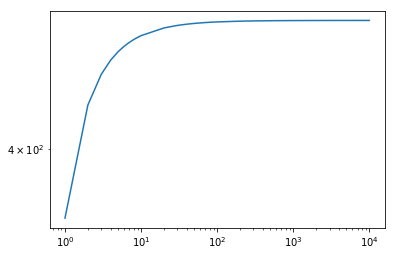

In [114]:
steps_count = []
for i in range(1,10):
    steps_count.append(i)
    steps_count.append(i*10)
    steps_count.append(i*100)
    steps_count.append(i*1000)
steps_count.append(10000)
steps_count.sort()

# N0 set as 1000, t=10
result_analytic = analytic(1000, 10)
#result_euler, result_RK4 = numpy.zeros([len(steps_count)]), numpy.zeros([len(steps_count)])
error_euler, error_RK4 = numpy.zeros([len(steps_count)]), numpy.zeros([len(steps_count)])

for i in range(len(steps_count)):
    euler = solve_euler(f_rad, 1000, 0, 10/steps_count[i], steps_count[i])
    result_euler = euler[0] - euler[len(euler)-1]
    
    RK4 = solve_RK4(f_rad, 1000, 0, 10/steps_count[i], steps_count[i])
    result_RK4 = RK4[0] - RK4[len(RK4)-1]
    
    error_euler[i] = abs(result_euler-result_analytic)
    error_RK4[i] = abs(result_RK4-result_analytic)
    
print(error_euler, "\n", error_RK4)
print(result_analytic)

plt.figure()
plt.loglog(steps_count, error_euler)
plt.show()